# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ACCESSING THE DATASET

In [2]:
df=pd.read_csv(r'C:\Users\tejith\Downloads\Python-Projects-Detecting-Fake-News\Data\news.csv')

In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


# INSPECTING THE DATASET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [9]:
df.shape

(6335, 4)

# Checking the missing data

In [10]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [11]:
df.isnull().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

In [12]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [22]:
labels= df.label
labels.head(10)

0    REAL
1    REAL
2    FAKE
3    REAL
4    FAKE
5    REAL
6    REAL
7    REAL
8    FAKE
9    REAL
Name: label, dtype: object

In [13]:
df=df.sample(frac=1)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

# PLOTTING THE DATA

<Axes: xlabel='label', ylabel='count'>

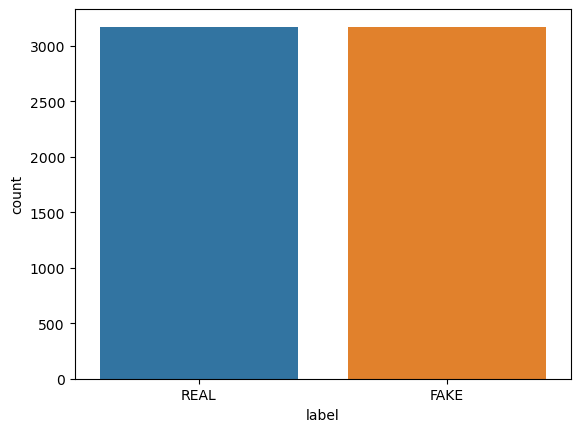

In [15]:
sns.countplot(data=df,x='label',order=df['label'].value_counts().index)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# train test split 

In [23]:
x_train, x_test, y_train, y_test= train_test_split(df["text"], labels, test_size= 0.4, random_state= 7)

In [24]:
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train) 
tfidf_test=vectorizer.transform(x_test)

In [25]:
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)
y_pred=passive.predict(tfidf_test)

In [26]:
mat= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
mat

array([[1206,   66],
       [ 109, 1153]], dtype=int64)

In [27]:
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.0939226519337

# Correlation & heatmap

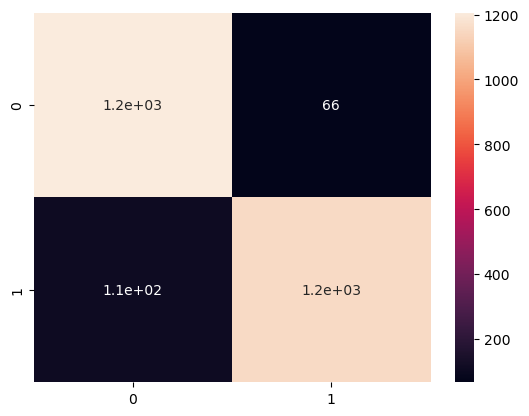

In [29]:
sns.heatmap(mat, annot=True)
plt.show()

In [30]:
Ret= classification_report(y_test, y_pred)
print(Ret)

              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93      1272
        REAL       0.95      0.91      0.93      1262

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



In [31]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[1206,   66],
       [ 109, 1153]], dtype=int64)